<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EB%A6%AC%EB%B7%B0/%EC%87%BC%ED%95%91%EB%AA%B0_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 4.7 MB 26.7 MB/s 
     |████████████████████████████████| 1.3 MB 52.4 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 6.6 MB 45.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=133e826e97e1dbab5c0a4b56a9a4b13d08b8d62a02c55626a9e946ad33a3e096
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.8 MB/s 
     |████████████████████████████████| 453 kB 44.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import itertools

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [6]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [7]:
train.drop('id',inplace=True,axis=1)
test.drop('id',inplace=True,axis=1)

In [8]:
display(train.head())
print()
display(test.head())

,reviews,target
0,조아요 처음구입 싸게햇어요,2
1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,튼튼하고 손목을 잘 받쳐주네요~,5


,reviews
0,채소가 약간 시들어 있어요
1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요


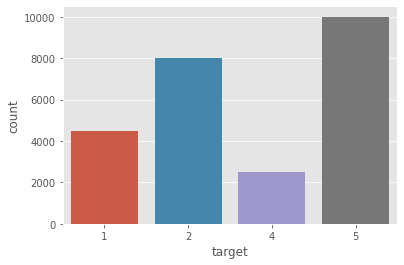

In [9]:
sns.countplot(data=train,x='target')

## 형태소 분석, 품사 태깅, 전처리

In [10]:
pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 4.8 MB/s 


In [11]:
from soynlp.normalizer import *
import re

okt=Okt()

def normalization(df):
  clean=[]
  for text in df.reviews.to_list():

    text = re.sub('\.*!+', '!', text)
    text = re.sub('\.*\?+', '?', text)
    text = re.sub('\.+', '.', text)
    text = re.sub(',+', ',', text)
    text = re.sub('[^A-Za-z0-9가-힣\s\[\].,!?\"\']', '', text)
    text = emoticon_normalize(only_text(text), num_repeats=1)
    text = re.sub('\s+', ' ', text)
    clean.append(text)

  return clean

In [12]:
clean_train=normalization(train)
train['clean_train']=clean_train
print(train.columns)

Index(['reviews', 'target', 'clean_train'], dtype='object')


In [13]:
train.head()

,reviews,target,clean_train
0,조아요 처음구입 싸게햇어요,2,조아요 처음구입 싸게햇어요
1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데 25천원가량 주고 사기 너무 아깝네요
2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...
4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목을 잘 받쳐주네요


In [14]:
review_doc=''

for review in train.clean_train:
  review_doc+=' '+review

print(review_doc)

 조아요 처음구입 싸게햇어요 생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데 25천원가량 주고 사기 너무 아깝네요 디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져있네요 귀찮아서 그냥쓰려구요 배송기사님은 친절하셨어요 기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘플 써보고 마음에 들어 구매해 사용중 같은 제품을 팔지 않아 할수 없이 플러스를 구매했는데요, 감고나도 머리가 개운하지 않고 간지럽네요. 저랑은 잘 안맞는듯해요. 튼튼하고 손목을 잘 받쳐주네요 배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착해서 좋았구요,하루전날 배송 아저씨가 전화와서 내일13시사이에 온다고 하더니 7시에왔어요화나 타이밍이 좋았는지 배송도 빠르고 맛있었어요! 크기가 두가지가 있길래 큰걸 사봤는데 기존에 사먹어봤던거랑 크기 차이는 없네요 그래도 신선하고 맛있어요! 상품 퀄리티가 좋지 않아요 재구매 평소 사용하던 제품이에요. 한번에 쟁여두려 여러개 삽니다 . 두께 때문에 별로네요. 재구매 항상 여기서만 주문해서 잘 쓰고있어요 후딱쓰기좋아요 크기도 좋구 화면하고 전혀틀림 재구매 좋은제품 저렴하게 잘 구매했습니다. 너무 잘사용했어요 감사합니다 촉촉하고 피부트러블이.없어요 .가성비 갑 다른거는 다만족하는데 나사부분이맘엥들어서 재구매 별로별로별로별로 불량품 교환이나 환불 미흡 고객센터 개인 휴대폰번호 이제 다른곳으로 주문, 별로별로 튼튼하고.좋아요 깔끔하게 정리되어서좋아요 빠른배송 신속한서비스로 잘 받았습니다. 완전 골아서 왔어요 집에서 썩은내가 진동해서 베란다문 열고 그래도 내장이랑 분리 해봤네요 오징어가 다 핑크색으로 변해있더라구요 내장과 분리해도 냄새가나서 버려야할듯 완전 쓰레기를 돈주고 샀네요 제발 이런 상품 팔지 마세요 동네 마트가 더 산선해요 강추해요 너무 잘쓰고 있어 먼지가적다고하는데 전적은지모르겠어요. 극세사라고하던데.어느면이극세사인지도모르겠고요.아쉬워요.이럴줄알았음 돈더주고 

In [15]:
okt=Okt()

tokenized_doc=okt.pos(review_doc)
tokenized_nouns=' '.join([word[0] for word in tokenized_doc if word[1]=='Noun'])

print('품사 태깅 10개만 출력 :',tokenized_doc[:10])
print('명사 추출 :',tokenized_nouns)


품사 태깅 10개만 출력 : [('조아요', 'Adjective'), ('처음', 'Noun'), ('구입', 'Noun'), ('싸게', 'Verb'), ('햇', 'Noun'), ('어', 'Suffix'), ('요', 'Josa'), ('생각', 'Noun'), ('보다', 'Josa'), ('잘', 'Verb')]
명사 추출 : 처음 구입 햇 생각 하루 사기 디자인 상품 금 교환 두번째 상품 안쪽 금 그냥 배송 기사 기전 이 제품 이마트 트 레이더스 프리미엄 제품 사용 샘플 보고 마음 구매 사용 제품 팔지 플러스 구매 머리 저 해 손목 배송 먼저 구입 분 참고 기 생각 일찍 하루 전날 배송 아저씨 전화 내일 타이밍 배송 크기 가지 걸 기존 크기 상품 퀄리티 평소 사용 제품 한번 쟁 개 두께 때문 별로 항상 여기 만 주문 쓰기 크기 화면 전혀 틀림 제품 구매 피부 트러블 가성 비 갑 거 나사 부분 이맘 별로 별로 별로 별로 불량품 교환 환불 미흡 고객 센터 개인 휴대폰번호 이제 곳 주문 별로 별로 정리 배송 서비스 완전 집 진동 베란다 문 내장 분리 오징어 핑크색 내장 분리 냄새 가나 완전 쓰레기 돈 제발 상품 팔지 동네 마트 더 산 강 먼지 전적 은지 극세사 면 극세사 인지도 돈 제품 배송 기사 기본 생각 주방 두기 수납 그대로 사이즈 정리 굿굿 차량 용 선글라스 클립 낚 구매 여러가지 번 주문 제일 맘 드 요가 성비 아주 생각 번창 굿 아주 맛 행사 때문 구입 성능 기대 세척 냄새 머리 배송 완전 항상 루이보스 티 색깔 팔걸이 쿠션 인터넷 참나 어제 바로 사용 땅 박 수 끝 부분 이 담날 땅 이건 머 일회용 설 연휴 줄 바로 매트리스 양도 가족 쓰기 펌핑식 위생 정력 충전 사실 그냥 방치 성인 명 듯 색상 다리 모양 제 프린터 문제 줄 다른 사람 모양 벌레 모양 양 밖 더 양념 통 개 일병 개 주문 양념 통 뚜껑 하나 스텐마감 검지 손가락 피 환불 클레 임 제품 이상 당장 일이 그냥 스 텐마 감 확인 모양 달 문제 사용 양도 꽤 상태 아이 머리 바로 

In [16]:
n_gram_range=(2,3)

count=CountVectorizer(ngram_range=n_gram_range).fit([tokenized_nouns])
candidates=count.get_feature_names_out()

print('trigram 개수:',len(candidates))
print('trigram 다섯개만 추출 :',candidates[:5])

trigram 개수: 192596
trigram 다섯개만 추출 : ['가가 만족' '가가 만족 번은' '가가 매장' '가가 매장 배송비' '가가 장난감']


In [17]:
model=SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')
doc_embedding=model.encode([review_doc])
candidate_embeddings=model.encode(candidates)

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [18]:
top_n=5

distances=cosine_similarity(doc_embedding,candidate_embeddings)
keywords=[candidates[index] for index in distances.argsort()[0][-top_n:]]
print(keywords)

['제품 할인 친정', '가격 싼값 접착', '워낙 제품 구매', '칭찬 일색 구매', '제품 구매 다행']


In [19]:
doc_embedding

array([[-1.56318292e-01,  4.78782922e-01, -2.82321006e-01,
         2.86068376e-02,  1.28730964e-02, -3.15665513e-01,
         3.77891034e-01, -1.74327314e-01,  3.59683752e-01,
        -1.48142558e-02,  1.83366314e-01,  3.75433981e-01,
        -1.50121599e-01, -3.42809767e-01, -6.01015627e-01,
         1.27750356e-02,  3.58829871e-02, -5.16112745e-01,
         1.08192861e-01, -7.69193284e-04, -2.34100625e-01,
        -5.01483560e-01,  3.01802725e-01,  4.43154633e-01,
         3.82899269e-02,  6.77694321e-01,  2.27483004e-01,
         4.47200507e-01, -2.56044835e-01,  4.50262994e-01,
         4.10140157e-02, -1.59068465e-01, -1.90379918e-01,
        -5.51258981e-01, -3.49038303e-01,  2.95315087e-01,
         2.14243755e-01,  3.63635600e-01, -1.66210905e-01,
         2.52197266e-01, -3.42878774e-02,  1.08864725e-01,
         5.92369772e-02, -4.02640700e-01, -7.41330326e-01,
        -8.44809785e-02,  2.68900730e-02,  5.37498772e-01,
        -1.30547266e-02,  8.67378265e-02,  6.51117146e-0

In [20]:
candidate_embeddings

array([[ 0.03105596, -0.0232909 ,  1.7246193 , ...,  0.3407321 ,
        -0.1483387 ,  0.22985022],
       [ 0.0742619 , -0.0330002 ,  1.3688506 , ...,  0.18277098,
        -0.21495488,  0.13163128],
       [ 0.06981037,  0.01198042,  1.5172558 , ...,  0.08876107,
        -0.16035315,  0.11505246],
       ...,
       [ 0.07876374, -0.03104383,  1.2060992 , ...,  0.09277949,
        -0.17963716,  0.07652213],
       [-0.0935513 , -0.1484793 ,  1.0267136 , ...,  0.10609578,
        -0.14417614, -0.13916591],
       [-0.10210111, -0.13795575,  0.597472  , ...,  0.04036631,
        -0.17362939, -0.30433348]], dtype=float32)

In [21]:
candidates

array(['가가 만족', '가가 만족 번은', '가가 매장', ..., '힙니 사고 동네', '힙방석 오른쪽',
       '힙방석 오른쪽 무게중심'], dtype=object)

In [22]:
def mmr(doc_embedding,candidate_embeddings,words,top_n,diversity):
  #문서와 각 키워드들 간의 유사도가 적혀이는 리스트
  word_doc_similarity=cosine_similarity(candidate_embeddings,doc_embedding)

  #각 키워드들 간의 유사도
  word_similarity=cosine_similarity(candidate_embeddings)

  #문서와 가장 높은 유사도를 가진 키워드 인덱스 추출
  #만약 2번 문서가 가장 유사도가 높았다면
  #keywords_idx=[2]
  keywords_idx=[np.argmax(word_doc_similarity)]

  #가장 높으 유사도를 가진 키워드의 인텍스를 제외한 문서의 인덱스들
  #만약 2번 문서가 가장 유사도가 높았다면
  candidates_idx=[i for i in range(len(words)) if i!=keywords_idx[0]]

  #최고의 키워드는 이미 추출했으므로 top_n-1번 만큼 아래를 반복
  #ex) top_n=5라면 아래의 loop는 4번 반복됨. 
  for _ in range(top_n-1):
    candidate_similarities=word_doc_similarity[candidates_idx,:]
    target_similarities=np.max(word_similarity[candidates_idx][:,keywords_idx],axis=1)

    mmr=(1-diversity)*candidate_similarities-diversity*target_similarities.reshape(-1,1)
    mmr_idx=candidates_idx[np.argmax(mmr)]

    #keywords&candidates를 업데이트
    keywords_idx.append(mmr_idx)
    candidates_idx.remove(mmr_idx)

  return [words[idx] for idx in keywords_idx]

In [ ]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=5, diversity=0.2)